In [39]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [22]:
wine=load_wine()
wine_1_1_a = pd.DataFrame(wine.data, columns=wine.feature_names) 
wine_1_1_b = pd.Series(wine.target, name='target')

In [23]:
wine_1_2_a = wine_1_1_a.describe() 
print(wine_1_2_a)
wine_1_2_b = wine_1_1_a.isnull().sum()
print(wine_1_2_b) 
wine_1_2_c = wine_1_1_a.head()
print(wine_1_2_c)

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_1_1_a, wine_1_1_b, test_size=0.3, random_state=42 
)
print("Training Features Shape (X_train):", X_train.shape) 
print("Testing Features Shape (X_test):", X_test.shape)
print("Training Target Shape (y_train):", y_train.shape)
print("Testing Target Shape (y_test):", y_test.shape)  

Training Features Shape (X_train): (124, 13)
Testing Features Shape (X_test): (54, 13)
Training Target Shape (y_train): (124,)
Testing Target Shape (y_test): (54,)


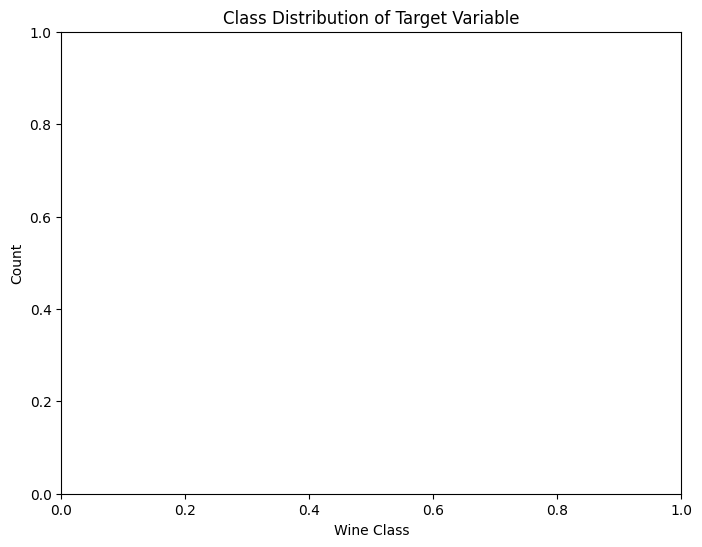

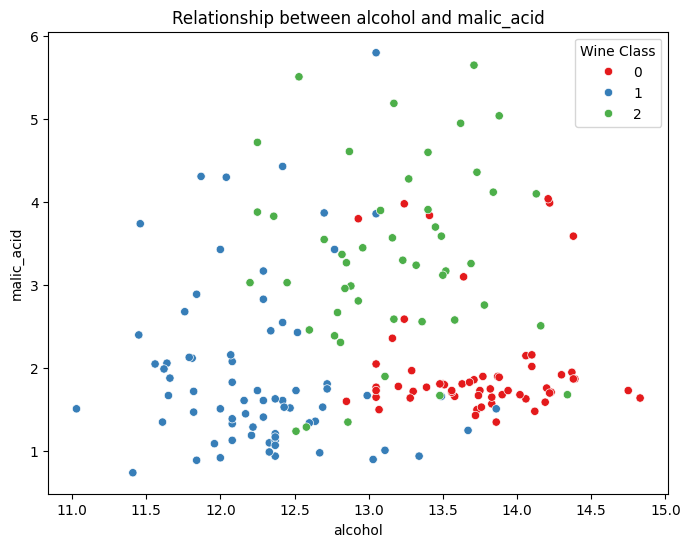

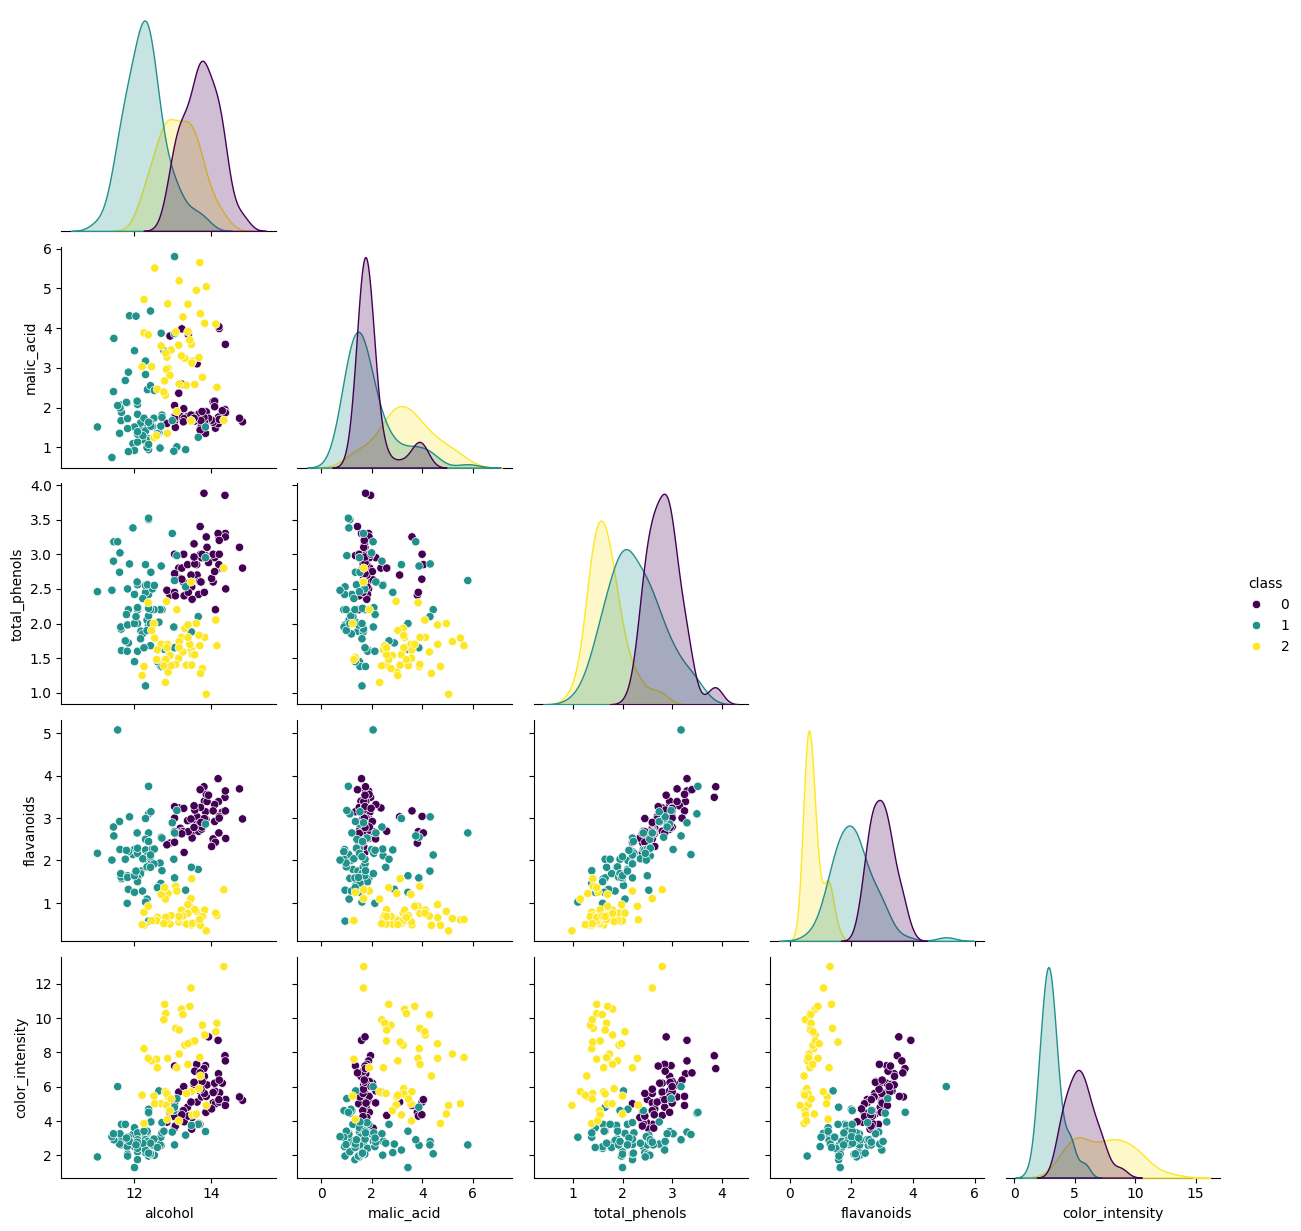

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(wine_1_1_a= wine_1_1_b)
plt.title('Class Distribution of Target Variable')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.show()

alchohol = 'alcohol'
acid = 'malic_acid'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=wine_1_1_a[alchohol], y=wine_1_1_a[acid], hue=wine_1_1_b, palette='Set1')
plt.title(f'Relationship between {alchohol} and {acid}')
plt.xlabel(alchohol)
plt.ylabel(acid)
plt.legend(title='Wine Class', loc='upper right')
plt.show()

selected_features = ['alcohol', 'malic_acid', 'total_phenols', 'flavanoids', 'color_intensity']
pairplot_data = wine_1_1_a[selected_features].copy()
pairplot_data['class'] = wine_1_1_b  # Add target class for coloring

sns.pairplot(pairplot_data, hue='class', diag_kind='kde', palette='viridis', corner=True)
plt.show()

In [42]:
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

k = 5  
knn = KNeighborsClassifier(n_neighbors=k) 
knn.fit(X_trainScaled, y_train)

yPred = knn.predict(X_testScaled)  

accuracy = accuracy_score(y_test, yPred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, yPred))
  
print("\nClassification Report:") 
print(classification_report(y_test, yPred))

Accuracy: 0.9630

Confusion Matrix:
[[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

